In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
import seaborn as sns
import sys
import os
sys.path.append(os.path.join(os.getcwd(),'..'))
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window

In [12]:
T = 133e-9
t = 10
n_per = int(t/T)
print("n_per = ",n_per)
a = np.random.binomial(1,0.01,n_per)

n_per =  75187969


In [13]:
n_of_chuncks = 50
chunk_length = n_per // n_of_chuncks
new_length = n_of_chuncks * chunk_length
chunks = np.reshape(a[:new_length],(n_of_chuncks,chunk_length))
print("chunk length = ",chunk_length)
n_events = sum(a)
print("n_events = ",n_events)

chunk length =  1503759
n_events =  752075


In [14]:
fanos = [calc_Fano_from_counts_per_time_window(x) for x in chunks]
fanos = sorted(fanos)
i1 = int(0.16*len(fanos))
i2 = int(0.84*len(fanos))
f1 = fanos[i1]
f2 = fanos[i2]
error = (f2-f1)/2
print("error = ",error)

error =  6.018251594885893e-05


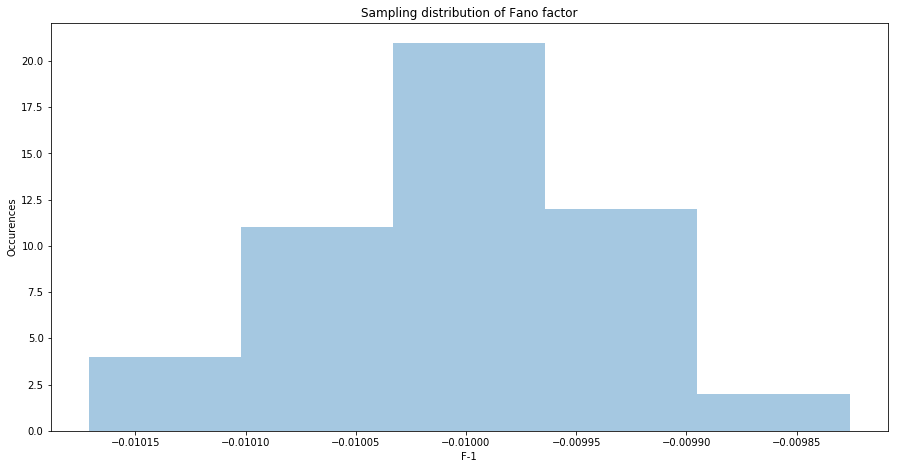

In [15]:
sns.distplot(fanos,kde=False,bins=5)
plt.xlabel("F-1")
plt.ylabel("Occurences")
plt.title("Sampling distribution of Fano factor")
plt.show()

In [6]:
p = 0.03
n_of_chunks = 200
def error(t):
    n_per = int(t/T)
    a = np.random.binomial(1,p,n_per)
    chunk_length = n_per // n_of_chunks
    new_length = n_of_chunks * chunk_length
    chunks = np.reshape(a[:new_length],(n_of_chunks,chunk_length))
    n_events = sum(a)
    fanos = [calc_Fano_from_counts_per_time_window(x) for x in chunks]
    fanos = sorted(fanos)
    i1 = int(0.16*len(fanos))
    i2 = int(0.84*len(fanos))
    f1 = fanos[i1]
    f2 = fanos[i2]
    error = (f2-f1)/2
    return n_events, error

In [7]:
t_arr = [0.5,0.75,1,2,3,4,5,6,7,8,9,10,20]
n_ev_arr = []
error_arr = []
for t in t_arr:
    n_ev, er = error(t)
    n_ev_arr.append(n_ev)
    error_arr.append(er)

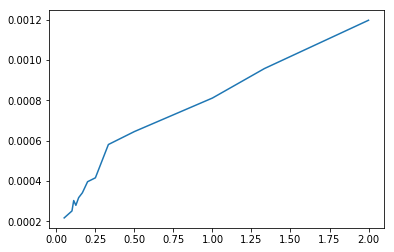

In [8]:
plt.plot([1/t for t in t_arr],error_arr)
plt.show()

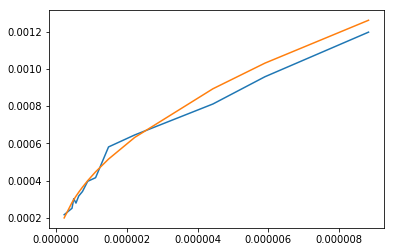

In [9]:
plt.plot([1/n for n in n_ev_arr],error_arr)
plt.plot([1/n for n in n_ev_arr],[p*np.sqrt(n_of_chunks/n) for n in n_ev_arr])
plt.show()

In [10]:
7.85e-3*7.5e6

58874.99999999999